In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Read Dataset
dbdb = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4105a3/diabetes.csv')
cndb = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4105a3/cancer.csv')

np.random.seed(0)

nmlz = StandardScaler()

In [47]:
dbdbtrain, dbdbtest = train_test_split(dbdb, train_size = 0.8, test_size = 0.2, random_state = 100)
dbdbtrain.head()

trainexplanatory = nmlz.fit_transform(dbdbtrain.iloc[:, [0,1,2,3,4,5,6,7]].values)
traintruth = dbdbtrain.iloc[:, 8].values

testexplanatory = nmlz.fit_transform(dbdbtest.iloc[:, [0,1,2,3,4,5,6,7]].values)
testtruth = dbdbtest.iloc[:, 8].values

In [48]:
classifier = LogisticRegression(random_state=0)
classifier.fit(trainexplanatory, traintruth)

predicttruth = classifier.predict(testexplanatory)

cnf_matrix = confusion_matrix(testtruth, predicttruth)
cnf_matrix

array([[86, 15],
       [25, 28]])

Accuracy: 0.7402597402597403
Precision: 0.6511627906976745
Recall: 0.5283018867924528
F1: 0.5833333333333333


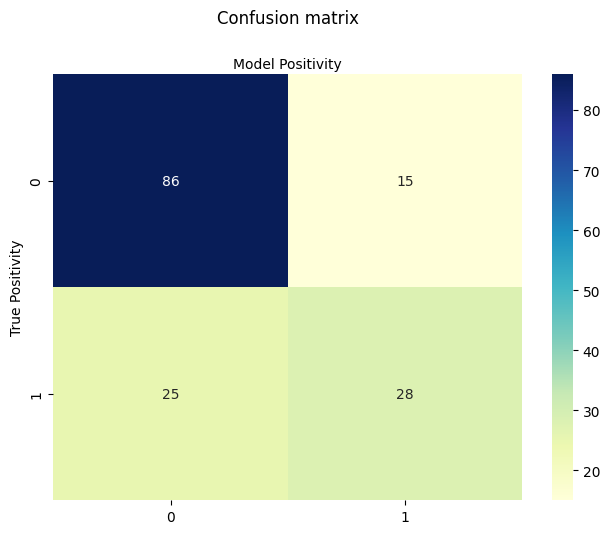

In [49]:
#Problem 1 Output

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True Positivity')
plt.xlabel('Model Positivity')

precision = metrics.precision_score(testtruth, predicttruth)
recall = metrics.recall_score(testtruth, predicttruth)

print("Accuracy:",metrics.accuracy_score(testtruth, predicttruth))
print("Precision:", precision)
print("Recall:", recall)
print("F1:",((2*precision*recall)/(precision+recall)))

In [50]:
def binary_map(x):
    return x.map({'B': 1, 'M': 0})
applyto =  ['diagnosis']

cndbtrain, cndbtest = train_test_split(cndb, train_size = 0.8, test_size = 0.2, random_state = 100)
cndbtrain[applyto] = cndbtrain[applyto].apply(binary_map)
cndbtest[applyto] = cndbtest[applyto].apply(binary_map)

trainexplanatory = nmlz.fit_transform(cndbtrain.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values)
traintruth = cndbtrain.iloc[:, 1].values

testexplanatory = nmlz.fit_transform(cndbtest.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values)
testtruth = cndbtest.iloc[:, 1].values


classifier = LogisticRegression(random_state=0, penalty=None)
classifier.fit(trainexplanatory, traintruth)

predicttruth = classifier.predict(testexplanatory)

cnf_matrix = confusion_matrix(testtruth, predicttruth)
#cnf_matrix

Accuracy: 0.956140350877193
Precision: 0.9285714285714286
Recall: 1.0
F1: 0.962962962962963


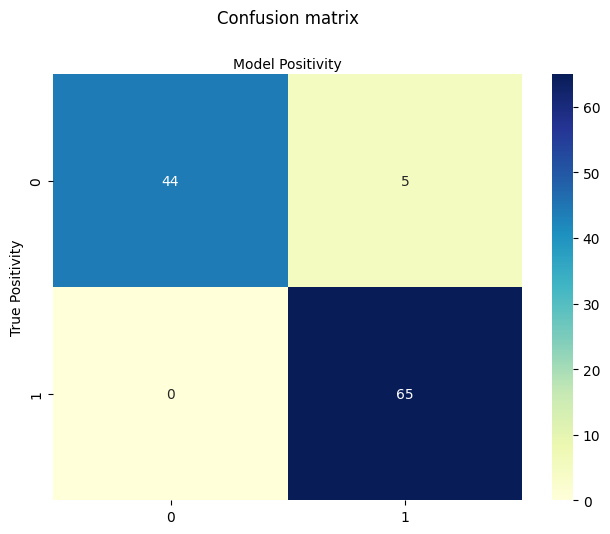

In [51]:
#Problem 2a Output

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True Positivity')
plt.xlabel('Model Positivity')

precision = metrics.precision_score(testtruth, predicttruth)
recall = metrics.recall_score(testtruth, predicttruth)

print("Accuracy:",metrics.accuracy_score(testtruth, predicttruth))
print("Precision:", precision)
print("Recall:", recall)
print("F1:",((2*precision*recall)/(precision+recall)))

Accuracy: 0.956140350877193
Precision: 0.9285714285714286
Recall: 1.0
F1: 0.962962962962963


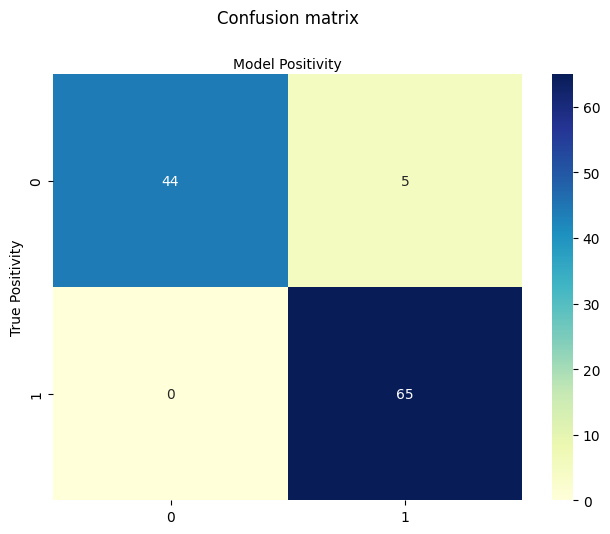

In [52]:
classifier = LogisticRegression(random_state=0, penalty='l2', C=1.0) #weight penalty was added in, values sweeped between 0.01 and 10, and no positive effects were seen. only negative effects.
classifier.fit(trainexplanatory, traintruth)

predicttruth = classifier.predict(testexplanatory)

cnf_matrix = confusion_matrix(testtruth, predicttruth)
#cnf_matrix

#Problem 2b Output

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True Positivity')
plt.xlabel('Model Positivity')

precision = metrics.precision_score(testtruth, predicttruth)
recall = metrics.recall_score(testtruth, predicttruth)

print("Accuracy:",metrics.accuracy_score(testtruth, predicttruth))
print("Precision:", precision)
print("Recall:", recall)
print("F1:",((2*precision*recall)/(precision+recall)))

In [53]:
#Problem 3 and Output

bayes = GaussianNB()

bayes.fit(trainexplanatory, traintruth)

# make predictions
expectedB = testtruth
predictedB = bayes.predict(testexplanatory)

# summarize the fit of the model
print(metrics.classification_report(expectedB, predictedB))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        49
           1       0.92      1.00      0.96        65

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [54]:
#problem 4

for n in range(1,30):
  pca = PCA(n_components=n)
  pcaSelectionTrain = pca.fit_transform(trainexplanatory)
  pcaSelectionTest = pca.fit_transform(testexplanatory)

  bayes.fit(pcaSelectionTrain, traintruth)

  # make predictions
  expectedB = testtruth
  predictedB = bayes.predict(pcaSelectionTest)

  # summarize the fit of the model
  #if (n == 5): #best fit was found to be 5
  print('\n\n',n,' PCA components')
  print(metrics.classification_report(expectedB, predictedB))




 1  PCA components
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       0.86      0.97      0.91        65

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



 2  PCA components
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       0.86      0.97      0.91        65

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



 3  PCA components
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       0.86      0.97      0.91        65

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted av

In [55]:
#problem 5

for n in range(1,30):
  pca = PCA(n_components=n)
  pcaSelectionTrain = pca.fit_transform(trainexplanatory)
  pcaSelectionTest = pca.fit_transform(testexplanatory)

  classifier.fit(pcaSelectionTrain, traintruth)

  predicttruth = classifier.predict(pcaSelectionTest)

  # summarize the fit of the model
  #if (n == 3): #best fit was found to be 3
  precision = metrics.precision_score(testtruth, predicttruth)
  recall = metrics.recall_score(testtruth, predicttruth)

  print('\n\n',n,' PCA components')
  print("Accuracy:",metrics.accuracy_score(testtruth, predicttruth))
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1:",((2*precision*recall)/(precision+recall)))



 1  PCA components
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.9692307692307692
F1: 0.9197080291970802


 2  PCA components
Accuracy: 0.9385964912280702
Precision: 0.9142857142857143
Recall: 0.9846153846153847
F1: 0.9481481481481482


 3  PCA components
Accuracy: 0.9473684210526315
Precision: 0.9154929577464789
Recall: 1.0
F1: 0.9558823529411764


 4  PCA components
Accuracy: 0.9385964912280702
Precision: 0.9027777777777778
Recall: 1.0
F1: 0.9489051094890512


 5  PCA components
Accuracy: 0.9385964912280702
Precision: 0.9027777777777778
Recall: 1.0
F1: 0.9489051094890512


 6  PCA components
Accuracy: 0.9385964912280702
Precision: 0.9027777777777778
Recall: 1.0
F1: 0.9489051094890512


 7  PCA components
Accuracy: 0.9298245614035088
Precision: 0.8904109589041096
Recall: 1.0
F1: 0.9420289855072463


 8  PCA components
Accuracy: 0.9298245614035088
Precision: 0.8904109589041096
Recall: 1.0
F1: 0.9420289855072463


 9  PCA components
Accuracy: 0.9210526315789473
Precision: 0.